# Nama tim: FourTwo

## Pendahuluan

### Import dan membaca data

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_covid = pd.read_csv('data_covid_indo.csv', delimiter=";")
data_mobilitas = pd.read_csv('data_mobilitas_indo.csv')

## A. Problem statement  
    1. Cara menyaring data Covid-19, vaksinasi dan mobilitas di Jakarta
    2. Menganalisis data Covid-19, vaksinasi dan mobilitas di Jakarta
    3. Apakah ada korelasi antara data Covid-19, vaksinasi dan mobilitas di Jakarta
    4. Memvisualisasikan data Covid-19, vaksinasi dan mobilitas di Jakarta

---

## B. Data Cleaning dan Preprocessing


### Cleaning Data Mobilitas

In [134]:
# Filter data hanya di Jakarta
data_mobilitas = data_mobilitas.loc[data_mobilitas['sub_region_1']=='Jakarta']

# Sorting tanggal
data_mobilitas["date"] = pd.to_datetime(data_mobilitas["date"], dayfirst=True)
data_mobilitas = data_mobilitas.sort_values(by="date")

# Menghilangkan data kosong dan kolom yang tidak terpakai
data_mobilitas = data_mobilitas.drop(columns=['date', 'country_region_code', 'country_region', 'sub_region_1', 'sub_region_2', 'metro_area', 'iso_3166_2_code', 'census_fips_code', 'place_id']).dropna()
data_mobilitas = data_mobilitas.astype(int)

data_mobilitas.columns = data_mobilitas.columns.str.replace('_', ' ')
data_mobilitas.columns = data_mobilitas.columns.str.title()

data_mobilitas.reset_index(drop=True, inplace=True)

data_mobilitas

,Retail And Recreation Percent Change From Baseline,Grocery And Pharmacy Percent Change From Baseline,Parks Percent Change From Baseline,Transit Stations Percent Change From Baseline,Workplaces Percent Change From Baseline,Residential Percent Change From Baseline
0,-46,-27,-51,-61,-73,22
1,-39,-15,-50,-41,-33,11
2,-40,-19,-58,-34,-15,9
3,-29,-5,-50,-39,-32,13
4,-32,-9,-53,-39,-33,14
...,...,...,...,...,...,...
360,-5,12,-14,-26,-25,8
361,-7,10,-16,-25,-25,8
362,-6,11,-15,-25,-25,8
363,-2,18,-9,-22,-25,7


### Cleaning Data Covid

In [135]:
# Menghilangkan data kosong dan kolom yang tidak terpakai
data_covid = data_covid.drop(columns=['Meninggal (Indonesia)','Sembuh (Indonesia)', 'Dirawat (Indonesia)',
       'Positif (Indonesia)', 'Meninggal Harian (Indonesia)', 'Sembuh Harian (Indonesia)',
       'Dirawat Harian (Indonesia)','Positif Harian (Indonesia)']).dropna()

# Sorting dan filter tanggal hanya saat tahun 2022
data_covid["Tanggal"] = pd.to_datetime(data_covid["Tanggal"], dayfirst=True)
data_covid = data_covid.sort_values(by="Tanggal")
data_covid = data_covid[(data_covid['Tanggal'] >= "2021-01-01") & (data_covid['Tanggal']<= "2021-12-31")]

# Mengubah data yang bernilai negatif menjadi positif
data_covid_date = data_covid['Tanggal'].dt.strftime('%d/%m/%Y')
data_covid = data_covid.drop(columns=['Tanggal']).astype(int).abs()
data_covid.insert(0, "Tanggal", data_covid_date)

data_covid.columns = data_covid.columns.str.replace(' (Jakarta)', '', regex=False)

data_covid.reset_index(drop=True, inplace=True)

display(data_covid)

,Tanggal,Meninggal,Sembuh,Self-Isolation,Dirawat,Positif,Positif Aktif,Meninggal Harian,Sembuh Harian,Self-Isolation Harian,Dirawat Harian,Positif Harian,Positif Aktif Harian
0,01/01/2021,3308,166512,10082,5789,185691,15871,21,1631,336,32,1956,304
1,02/01/2021,3334,168781,10872,4599,187586,15471,26,2269,790,1190,1895,400
2,03/01/2021,3345,170510,10978,4410,189243,15388,11,1729,106,189,1657,83
3,04/01/2021,3369,173036,10371,4299,191075,14670,24,2526,607,111,1832,718
4,05/01/2021,3392,174131,10897,4479,192899,15376,23,1095,526,180,1824,706
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,27/12/2021,13584,851096,171,183,865034,354,0,88,5,41,42,46
361,28/12/2021,13585,851138,236,171,865130,407,1,42,65,12,96,53
362,29/12/2021,13587,851167,238,165,865157,403,2,29,2,6,27,4
363,30/12/2021,13587,851201,251,171,865210,422,0,34,13,6,53,19


---
## C.  Exploratory Data Analysis

### 1. Sample Data

In [136]:
# Data Mbolitias setelah cleaning
data_mobilitas.head()

,Retail And Recreation Percent Change From Baseline,Grocery And Pharmacy Percent Change From Baseline,Parks Percent Change From Baseline,Transit Stations Percent Change From Baseline,Workplaces Percent Change From Baseline,Residential Percent Change From Baseline
0,-46,-27,-51,-61,-73,22
1,-39,-15,-50,-41,-33,11
2,-40,-19,-58,-34,-15,9
3,-29,-5,-50,-39,-32,13
4,-32,-9,-53,-39,-33,14


In [137]:
# Data Covid-19 di Jakarta setelah cleaning
data_covid.head()

,Tanggal,Meninggal,Sembuh,Self-Isolation,Dirawat,Positif,Positif Aktif,Meninggal Harian,Sembuh Harian,Self-Isolation Harian,Dirawat Harian,Positif Harian,Positif Aktif Harian
0,01/01/2021,3308,166512,10082,5789,185691,15871,21,1631,336,32,1956,304
1,02/01/2021,3334,168781,10872,4599,187586,15471,26,2269,790,1190,1895,400
2,03/01/2021,3345,170510,10978,4410,189243,15388,11,1729,106,189,1657,83
3,04/01/2021,3369,173036,10371,4299,191075,14670,24,2526,607,111,1832,718
4,05/01/2021,3392,174131,10897,4479,192899,15376,23,1095,526,180,1824,706


### 2. Informasi Data
* Data Covid-19 setelah cleaning memiliki 13 kolom dengan 12 kolom berupa int64 (interger) dan 1 kolom date64 (date) dan memiliki 365 baris
* Data Mobilitas setelah cleaning memiliki 6 kolom int64 (interger) dan memiliki 365 baris

In [138]:
data_mobilitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column                                              Non-Null Count  Dtype
---  ------                                              --------------  -----
 0   Retail And Recreation Percent Change From Baseline  365 non-null    int32
 1   Grocery And Pharmacy Percent Change From Baseline   365 non-null    int32
 2   Parks Percent Change From Baseline                  365 non-null    int32
 3   Transit Stations Percent Change From Baseline       365 non-null    int32
 4   Workplaces Percent Change From Baseline             365 non-null    int32
 5   Residential Percent Change From Baseline            365 non-null    int32
dtypes: int32(6)
memory usage: 8.7 KB


In [139]:
data_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Tanggal                365 non-null    object
 1   Meninggal              365 non-null    int32 
 2   Sembuh                 365 non-null    int32 
 3   Self-Isolation         365 non-null    int32 
 4   Dirawat                365 non-null    int32 
 5   Positif                365 non-null    int32 
 6   Positif Aktif          365 non-null    int32 
 7   Meninggal Harian       365 non-null    int32 
 8   Sembuh Harian          365 non-null    int32 
 9   Self-Isolation Harian  365 non-null    int32 
 10  Dirawat Harian         365 non-null    int32 
 11  Positif Harian         365 non-null    int32 
 12  Positif Aktif Harian   365 non-null    int32 
dtypes: int32(12), object(1)
memory usage: 20.1+ KB


## 3. Deskripsi Data

In [140]:
data_mobilitas.describe()

,Retail And Recreation Percent Change From Baseline,Grocery And Pharmacy Percent Change From Baseline,Parks Percent Change From Baseline,Transit Stations Percent Change From Baseline,Workplaces Percent Change From Baseline,Residential Percent Change From Baseline
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,-23.967123,-0.501370,-41.547945,-36.673973,-29.701370,10.575342
std,11.168245,9.843731,13.409076,10.550012,12.411937,4.359270
min,-55.000000,-33.000000,-72.000000,-72.000000,-79.000000,2.000000
25%,-32.000000,-7.000000,-52.000000,-43.000000,-35.000000,8.000000
50%,-24.000000,0.000000,-43.000000,-36.000000,-30.000000,10.000000
75%,-15.000000,7.000000,-33.000000,-29.000000,-22.000000,13.000000
max,2.000000,34.000000,4.000000,-14.000000,-1.000000,28.000000


In [141]:
data_covid.describe()

,Meninggal,Sembuh,Self-Isolation,Dirawat,Positif,Positif Aktif,Meninggal Harian,Sembuh Harian,Self-Isolation Harian,Dirawat Harian,Positif Harian,Positif Aktif Harian
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,9462.098630,574325.084932,10566.052055,4786.367123,599139.602740,15352.419178,28.221918,1880.386301,720.063014,324.446575,1867.293151,932.098630
std,3689.748096,245699.119092,17801.514032,6001.439781,245389.615313,23438.539925,38.537730,3135.133176,1480.978007,577.065136,2751.645724,1855.263651
min,3308.000000,166512.000000,103.000000,107.000000,185691.000000,217.000000,0.000000,20.000000,1.000000,0.000000,14.000000,1.000000
25%,6351.000000,371254.000000,1246.000000,504.000000,384632.000000,1723.000000,3.000000,180.000000,38.000000,21.000000,149.000000,46.000000
50%,8547.000000,473467.000000,3820.000000,3441.000000,560408.000000,7335.000000,18.000000,889.000000,161.000000,98.000000,856.000000,222.000000
75%,13524.000000,842715.000000,10034.000000,5260.000000,857916.000000,15917.000000,39.000000,2205.000000,583.000000,329.000000,2361.000000,754.000000
max,13588.000000,851222.000000,88295.000000,30418.000000,865297.000000,113138.000000,265.000000,20570.000000,11310.000000,4253.000000,14619.000000,12107.000000


## 4. Modelling

In [142]:
# Merge 2 dataframe
df = pd.concat([data_covid, data_mobilitas], axis=1)

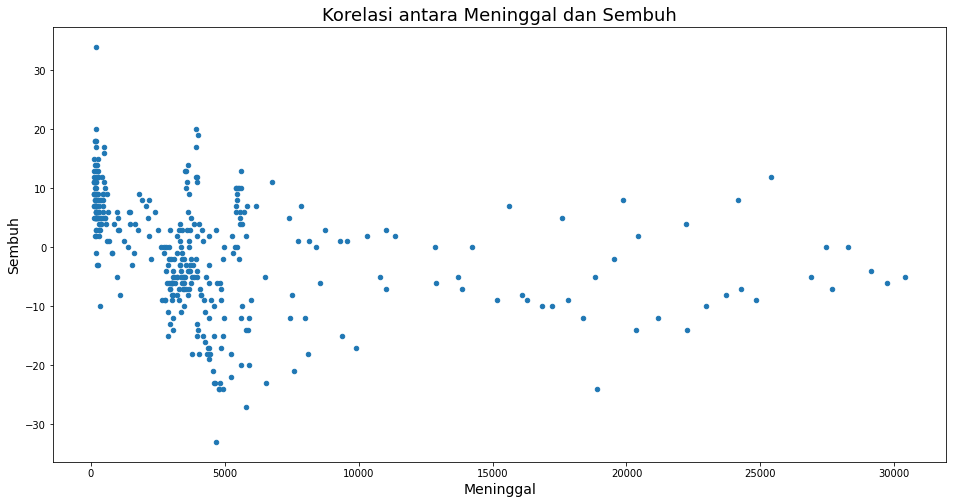

In [145]:
df.plot(kind="scatter", x="Dirawat", y="Grocery And Pharmacy Percent Change From Baseline", figsize=(16,8))
plt.title("Korelasi antara Meninggal dan Sembuh", fontsize=18)
plt.xlabel("Meninggal", fontsize=14)
plt.ylabel("Sembuh", fontsize=14)
plt.show()
